In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
from collections import Counter

def shared_chars(s1, s2):
    return sum((Counter(s1) & Counter(s2)).values())

def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

In [2]:
thailand = pd.read_excel('thailand_map.xlsx')
thailand

,Province,District,Postcode
0,Amnat Charoen,Mueang Amnat Charoen,37000
1,NaN,Chanunman,37210
2,NaN,Hua Taphan,37240
3,NaN,Lua Amnart,37000
4,NaN,Phana,37180
5,NaN,Senangkhanikhorn,37290
6,NaN,Phathumratvongsa,37110
7,Province,District,Postcode
8,Ang Thong,Mueang Ang Thong,14000
9,NaN,Chaiyo,14140


In [3]:
eng_thai_province = pd.read_excel('eng_thai_province.xlsx')
eng_thai_province.head()

,Province (changwat),จังหวัด
0,Krabi,กระบี่
1,Krabi,กระบี่
2,Krabi,กระบี่
3,Krabi,กระบี่
4,Krabi,กระบี่


In [4]:
eng_thai_dict = {}
for index in eng_thai_province.index:
    eng_thai_dict[eng_thai_province.loc[index, 'Province (changwat)']] = eng_thai_province.loc[index, 'จังหวัด']
eng_thai_dict['Bangkok'] = 'กรุงเทพมหานคร'
eng_thai_dict['Nongbua Lamphu'] = 'หนองบัวลำภู'
eng_thai_dict['Phangnga'] = 'พังงา'
eng_thai_dict['Prachinburi'] = 'ปราจีนบุรี'
eng_thai_dict['Si Saket'] = 'ศรีสะเกษ'
eng_thai_dict['Singburi'] = 'สิงห์บุรี'
eng_thai_dict['Suphanburi'] = 'สุพรรณบุรี'

In [5]:
import math
df = pd.DataFrame()
province = 'Amnat Charoen'
count = 0
for index in thailand.index:
    df1_dict = thailand.loc[index, 'Province':'Postcode'].to_dict()
    
    if str(df1_dict['Province']) == 'nan':
        df1_dict['province_in_thai'] = eng_thai_dict[province]
        df1_dict['Province'] = province
        if not math.isnan(df1_dict['Postcode']):
            df1 = pd.DataFrame(df1_dict, index=[str(df1_dict['Postcode'])] )
            df = pd.concat([df1,df])
            count += 1
    elif str(df1_dict['Province']) == 'Province':
        pass
    else:
        province = df1_dict['Province']
        df1_dict['province_in_thai'] = eng_thai_dict[province]
        if not math.isnan(df1_dict['Postcode']):
            df1 = pd.DataFrame(df1_dict, index=[ str(df1_dict['Postcode']) ] )
            df = pd.concat([df1, df])
        
        count += 1


In [6]:
df.to_excel('thailand_map.xls')

In [7]:
df.head()

,District,Postcode,Province,province_in_thai
35120,Thai Charoen,35120,Yasothon,ยโสธร
35170,Sai Mun,35170,Yasothon,ยโสธร
35150,Pa Tio,35150,Yasothon,ยโสธร
35130,Maha Chana Chai,35130,Yasothon,ยโสธร
35120,Loeng Nok Tha,35120,Yasothon,ยโสธร


In [8]:
raw_txt = pd.read_excel('cleaned_up_raw_txt.xls')
raw_txt.head()

,AddressLine1,AddressLine2,AddressLine3,Country code,CustomerConfirmationNumber,Parcel Label Photo,Recipient email,Recipient name,Recipient phone,Recipient state,Recipient zipcode,Unnamed: 11,AddressLine1.1,text,อำเภอ District
1384,บ.เอสแอนด์เจ อินเตอร์เนชั่นแนล อินเดอร์ไพร 600...,องขาม,NaN,,TDPSE04201708179,https://dhl.fareye.co/img/2017-08-11/4/cust_15...,,รัตนาวลี,952507257,ชลบุรี,20230,1384,บ.เอสแอนด์เจ อินเตอร์เนชั่นแนล อินเดอร์ไพร 600...,รัตนาวลี อารีกุล (65) ว\nบ.เอสแอนด์เ...,ศรีราชา
1353,5 ม.11 ตำบลคูบางหลวง,NaN,NaN,,TDPSL06201701278,https://dhl.fareye.co/img/2017-08-11/4/cust_15...,,คุณดาวเรือง,947096619,ปทุมธานี,12140,1353,5 ม.11 ตำบลคูบางหลวง,ม:\nNou:\n\nคุณดาวเรือง เจียกกระจ่าง\n\nบ้านเล...,ลาดหลุมแก้ว
10309,2 ห้อง259/1 ชั้น2 (ปัทมาคลินิค) เซ็นทรัลแอร์พอ...,ิดล ต.หายยา,NaN,,TDPSE09201715809,https://dhl.fareye.co/img/2017-09-28/4/cust_15...,,เพชรรัตน์,835709003,เชียงใหม่,50100,10309,2 ห้อง259/1 ชั้น2 (ปัทมาคลินิค) เซ็นทรัลแอร์พอ...,23.jacket ana\nเพชรรัตน์ กิตตินุสรณ์\n2 ห้อง25...,เมืองเชียงใหม่
10321,57 ม.4 ต.บ้านติ้ว,NaN,NaN,,TDPSE09201715797,https://dhl.fareye.co/img/2017-09-28/4/cust_15...,,ชุลีพร,910320092,เพชรบูรณ์,67110,10321,57 ม.4 ต.บ้านติ้ว,งา ae\n~\n\nนางสาวชุลีพร ฤทธิบุญ\n\n57 ม.4 ตเบ...,หล่มสัก
1025,บ.อินทรี อีโคไซเคิล 318 ม.2 ตำบลมะขามคู่,NaN,NaN,,TDPSL06201701159,https://dhl.fareye.co/img/2017-08-09/4/cust_15...,,คุณวริศศรา,957408920,ระยอง,21180,1025,บ.อินทรี อีโคไซเคิล 318 ม.2 ตำบลมะขามคู่,กรุณาส่ง : คุณวริศศรา บุญโต / แผนกบัญชี-การเงิ...,นิคมพัฒนา


In [16]:
# # # created a dataset that use postcode as index
thai_province_list = set(df.loc[:,'province_in_thai'])
len(thai_province_list) ## it have 77 province

77

In [30]:
def get_province_postcode(text, index):
    if len(str(text)) < 10:
        print ('text too short', index)
    postcodes = [int(float(s[:5])) for s in re.findall(r'-?\d+\.?\d*', text) if len(str(int(float(s[:5]))))>=5 and int(float(s[:5])) >= 0]
    for postcode in postcodes:
        try:
            province = df.at[str(postcode),'province_in_thai'][0] if len(df.at[str(postcode),'province_in_thai'][0]) > 1 else df.at[str(postcode),'province_in_thai'] # special indexing to get the value
            return (province)
            
        except Exception as e:
            return ('unable to locate province through possible postcode')
            
def get_province_levenshtein(text):         
    words = text.split()
    final_dict = {}        
    for word in words:
        # check the correct word that have a lot of common with the word
        word = purge(word)
        # loop through all the states and see which one get higher accuracy       
        dict_score = defaultdict(lambda: 20)

        for province in thai_province_list:
            purged_province = purge(province)
            
            if shared_chars(word, purged_province) >= 2:
                if purged_province[:2] in word:
                    word_cut = word[word.find(purged_province[:2]):]
                    if purged_province[-2:] in word_cut:
                        word_cut = word_cut[:word.find(purged_province[-2:])]
                elif purged_province[1] in word:
                    word_cut = word[word.find(purged_province[0])+1:]
                elif purged_province[0] in word:
                    word_cut = word[word.find(purged_province[0]):]
                else:
                    word_cut = word
                score = levenshtein(purged_province, word_cut)/len(word_cut)
#                 print(levenshtein(province, word_cut)/len(word_cut), word_cut,province)
                dict_score[province] = min(score, dict_score[province])
        
        correct_province = {k:v for k,v in dict_score.items() if v == min(dict_score.values())}
        final_dict = {**final_dict, **correct_province}
    return list( {k:v for k,v in final_dict.items() if v == min(final_dict.values())}.keys() )
        
            
def purge(string):
    new_string = ''
    delete_list = [b'\xe0\xb8\xb1',b'\xe0\xb8\xb3',b'\xe0\xb8\xb4',b'\xe0\xb8\xb5',b'\xe0\xb8\xb6',b'\xe0\xb8\xb7',b'\xe0\xb8\xb8',b'\xe0\xb8\xb9',b'\xe0\xb8\xba',b'\xe0\xb9\x87',b'\xe0\xb9\x88',b'\xe0\xb9\x89',b'\xe0\xb9\x8a',b'\xe0\xb9\x8b',b'\xe0\xb9\x8c',b'\xe0\xb9\x8d',b'\xe0\xb9\x8e']
    for char in string:
        if char.encode('utf') not in delete_list:
            new_string += char
    return new_string

In [18]:
df.at['35120', 'province_in_thai'][0]

'ยโสธร'

In [19]:
word = purge('จ.ภเก็ต'); province = purge('ภเกต')
if shared_chars(word, province) >= 2:
    if province[:2] in word:
        word = word[word.find(province[:2]):]
    elif province[1] in word:
        word = word[word.find(province[0])+1:]
    elif province[0] in word:
        word = word[word.find(province[0]):]
    score = levenshtein(province, word)/len(word)


# 105 out of 196 valid ones are correct

In [20]:
postcode = []
format_wrong=0;format_right=0
for index in raw_txt.index:
    try:
        text = raw_txt.get_value(index,'text')
        postcode.append([get_province_postcode(text,index),raw_txt.get_value(index,'Recipient state'),index])
        format_right+=1
    except Exception:
        postcode.append(['text format wrong',raw_txt.get_value(index,'Recipient state'),index])
        format_wrong+=1
print(format_right)
print(postcode)
print(len(raw_txt))

170
[['unable to locate province through possible postcode', 'ชลบุรี', 1384], ['ปทุมธานี', 'ปทุมธานี', 1353], ['unable to locate province through possible postcode', 'เชียงใหม่', 10309], ['unable to locate province through possible postcode', 'เพชรบูรณ์', 10321], ['ระยอง', 'ระยอง', 1025], ['unable to locate province through possible postcode', 'ศรีสะเกษ', 10296], ['ปราจีนบุรี', 'ปราจีนบุรี', 10255], ['นครราชสีมา', 'นครราชสีมา', 10241], ['กรุงเทพมหานคร', 'กรุงเทพ', 10240], ['นครปฐม', 'นครปฐม', 10254], [None, 'อุตรดิตถ์', 10268], ['กรุงเทพมหานคร', 'กรุงเทพ', 10297], [None, 'สกลนคร', 1018], ['กรุงเทพมหานคร', 'กรุงเทพ', 1030], ['กรุงเทพมหานคร', 'กรุงเทพ', 1024], ['พระนครศรีอยุธยา', 'อยุธยา', 1150], ['กรุงเทพมหานคร', 'กรุงเทพ', 10693], ['กรุงเทพมหานคร', 'กรุงเทพ', 10320], [None, 'ปทุมธานี', 10308], ['กรุงเทพมหานคร', 'กรุงเทพ', 1420], ['กรุงเทพมหานคร', 'กรุงเทพ', 1422], ['unable to locate province through possible postcode', 'สมุทรสาคร', 1224], ['สมุทรสาคร', 'สมุทรสาคร', 10242], ['กรุงเทพมหา

/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


## reasons for error:
1. do not have the zip code in the database
2. tesseract processing 50100 to 506106


# 67 correct out of 139

In [21]:
stat_dict = {}
format_right = 0; format_wrong = 0
for index in raw_txt.index:
    try:
        text = raw_txt.get_value(index,'text')
        stat_dict[index] = [get_province_levenshtein(text),raw_txt.get_value(index,'Recipient state')]
        format_right += 1
    except Exception:
#         stat_dict[index] = ['text format wrong',raw_txt.loc[index,'Recipient state']]
        format_wrong += 1
print(stat_dict)
print(len(stat_dict))


/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


{1384: [['ชลบุรี'], 'ชลบุรี'], 1353: [['ปทุมธานี'], 'ปทุมธานี'], 10309: [['เชียงใหม่'], 'เชียงใหม่'], 10321: [['เพชรบูรณ์'], 'เพชรบูรณ์'], 1025: [['ระยอง'], 'ระยอง'], 10296: [['ศรีสะเกษ'], 'ศรีสะเกษ'], 10255: [['ปราจีนบุรี'], 'ปราจีนบุรี'], 10241: [['นครราชสีมา'], 'นครราชสีมา'], 10240: [['ราชบุรี'], 'กรุงเทพ'], 10254: [['ลำพูน'], 'นครปฐม'], 10268: [['ตาก'], 'อุตรดิตถ์'], 10297: [['น่าน'], 'กรุงเทพ'], 1018: [['ตราด'], 'สกลนคร'], 1030: [['น่าน'], 'กรุงเทพ'], 1024: [['หนองคาย', 'แม่ฮ่องสอน'], 'กรุงเทพ'], 1150: [['ลำพูน'], 'อยุธยา'], 10693: [['ตราด'], 'กรุงเทพ'], 10320: [['นครราชสีมา'], 'กรุงเทพ'], 10308: [['ปทุมธานี'], 'ปทุมธานี'], 1420: [['ชัยนาท'], 'กรุงเทพ'], 1422: [['หนองคาย'], 'กรุงเทพ'], 1224: [['พิจิตร'], 'สมุทรสาคร'], 10242: [['สมุทรสาคร'], 'สมุทรสาคร'], 10256: [['เลย'], 'กรุงเทพ'], 10294: [['ภูเก็ต'], 'ภูเก็ต'], 1033: [['พระนครศรีอยุธยา'], 'อยุธยา'], 1153: [['ตราด'], 'กรุงเทพ'], 1423: [['เพชรบุรี'], 'กรุงเทพ'], 1386: [['กาญจนบุรี'], 'กาญจนบุรี'], 1382: [['อุดรธานี'], 'อุดรธานี'],

# 110 text format wrong and 35 None

In [41]:
address = list()

for index in raw_txt.index:
    
    text = raw_txt.get_value(index,'text')
    if get_province_postcode(text, index) == 'unable to locate province through possible postcode' or get_province_postcode(text, index) == None:
        
        text = raw_txt.get_value(index,'text')
        address.append([get_province_levenshtein(text),raw_txt.get_value(index,'Recipient state'), index])
    else:
        try:
            text = raw_txt.get_value(index,'text')
            address.append([get_province_postcode(text,index),raw_txt.get_value(index,'Recipient state'),index])
        except Exception:
            address.append(['err', index])
    
# print(address)
print(len(address))
count = 0
print(address)

/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/i351707/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.

170
[[['หนองคาย'], 'ชลบุรี', 1384], ['ปทุมธานี', 'ปทุมธานี', 1353], [['เชียงใหม่'], 'เชียงใหม่', 10309], [['เพชรบุรี', 'เพชรบูรณ์'], 'เพชรบูรณ์', 10321], ['ระยอง', 'ระยอง', 1025], [['ศรีสะเกษ'], 'ศรีสะเกษ', 10296], ['ปราจีนบุรี', 'ปราจีนบุรี', 10255], ['นครราชสีมา', 'นครราชสีมา', 10241], ['กรุงเทพมหานคร', 'กรุงเทพ', 10240], ['นครปฐม', 'นครปฐม', 10254], [['ตาก'], 'อุตรดิตถ์', 10268], ['กรุงเทพมหานคร', 'กรุงเทพ', 10297], [['ตราด'], 'สกลนคร', 1018], ['กรุงเทพมหานคร', 'กรุงเทพ', 1030], ['กรุงเทพมหานคร', 'กรุงเทพ', 1024], ['พระนครศรีอยุธยา', 'อยุธยา', 1150], ['กรุงเทพมหานคร', 'กรุงเทพ', 10693], ['กรุงเทพมหานคร', 'กรุงเทพ', 10320], [['ปทุมธานี'], 'ปทุมธานี', 10308], ['กรุงเทพมหานคร', 'กรุงเทพ', 1420], ['กรุงเทพมหานคร', 'กรุงเทพ', 1422], [['พิจิตร'], 'สมุทรสาคร', 1224], ['สมุทรสาคร', 'สมุทรสาคร', 10242], ['กรุงเทพมหานคร', 'กรุงเทพ', 10256], [['ภูเก็ต'], 'ภูเก็ต', 10294], [['พระนครศรีอยุธยา'], 'อยุธยา', 1033], ['กรุงเทพมหานคร', 'กรุงเทพ', 1153], ['กรุงเทพมหานคร', 'กรุงเทพ', 1423], ['กาญจนบุรี'

10516, 1389, 10268, 1304,  tesseract unable to catch information or wrong information for the zip code
1047 have confusing numbers as postcode have two address



In [2]:
from pytesseract import image_to_string
import cv2
from PIL import Image

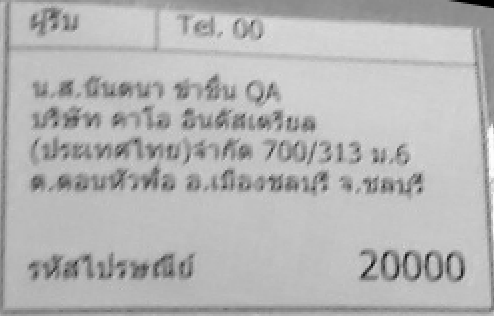

In [43]:
image = Image.open('/Users/i351707/Desktop/tesseract_wrong/1268-test.png')
image

In [44]:
txt = image_to_string(image,lang='tha+eng')
print(txt)

๓

น.ส.นันดนา ชําขึน 0

rssh กด
¢         ทย       700|313 ม6
ต.ดอบหัวท่อ อ.เมืองชลบุรี จ.ชลบุรี

Tel, 60

 
                                                                                                                                                                                                                                                                       
     

รหัสไปรษณีย์              20000
